In [24]:
import sympy as sym

x = sym.symbols('x')
sym.solveset(x**2 + 1, x)


FiniteSet(I, -I)

In [25]:
x, y, z = sym.symbols('x y z')
sym.linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))

FiniteSet((-y - 1, y, 2))

In [22]:
k, m, n = sym.symbols('k m n', integer=True)

sym.linsolve([k + m + n - 1, k + m + 2*n - 3 ], (k, m, n))


FiniteSet((-m - 1, m, 2))

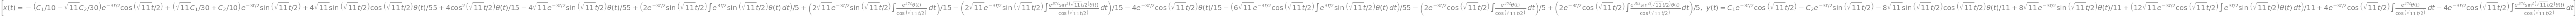

In [38]:
from sympy import *

import sympy.functions.special.delta_functions as sfuncs
from sympy.abc import *
init_printing()

t, C1, C2= symbols("t C1 C2")
x, y =  symbols("x y", cls = Function, Function = True)

eq1 = Eq(3 * diff(x(t), t), y(t))
eq2 = Eq(diff(y(t),t), - 3 * y(t) - 15 * x(t) + 4 * sfuncs.Heaviside(t))
eq2 = Eq(diff(y(t),t), - 3 * y(t) - 15 * x(t) + 4 * 1)

soln = dsolve((eq1, eq2), ics = {x: 5, y: 0})
soln

In [18]:
from shapely.geometry import  Point, LineString, Polygon
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive 

def polygon(n):
        angle = math.pi * 2 / n
        polygon1 = Polygon([
                (math.sin(angle * i ) * 5,
                math.cos(angle * i ) * 5)
                for i in range(int(n))])

        x,y = polygon1.exterior.xy
        
        plt.plot(x,y)
        plt.axis('equal') 
        plt.axis('off') 
        plt.show()

interactive(polygon, n=(3,16,0.1))

interactive(children=(FloatSlider(value=9.0, description='n', max=16.0, min=3.0), Output()), _dom_classes=('wi…

In [19]:
# %matplotlib inline
from ipywidgets import interactive, HBox, Output
import matplotlib.pyplot as plt
import numpy as np
import math

fig = plt.figure(2)
out = Output()
def polygon(sides):
    
    

    angle = 2*math.pi/(sides)
    T = np.arange(-math.pi,math.pi+angle, angle)
    

    x, y = np.cos(T), np.sin(T)
    plt.plot(x,y)
    
    plt.axis('equal') 
    with out:
        plt.show()

interactive_plot = interactive(polygon, sides=(2,16,0.1))
HBox([interactive_plot, out])

In [20]:
from ipywidgets import Label, HTML, HBox, Image, VBox, Box, HBox
from IPython.display import display
from ipyevents import Event 
from ipycanvas import Canvas

canvas = Canvas(width=200, height=200)

canvas.fill_style = '#63934e'
canvas.stroke_style = '#4e6393'
canvas.line_width = 5
# canvas.fill_polygon([(20, 20), (180, 20), (100, 150)])
coords = []

canvas.stroke_polygon(coords)

im_events = Event()
im_events.source = canvas
im_events.watched_events = ['click', 'keyup', 'keydown']

# no_drag = Event(source=canvas, watched_events=['dragstart'], prevent_default_action = True)

h2 = HTML('Event info')

def update_coords(event):
    canvas.clear()
    lines = ['{}: {}'.format(k, v) for k, v in event.items()]
    content = '<br>'.join(lines)
    h2.value = content
    coords.append((event['layerX'], event['layerY']))
    canvas.stroke_polygon(coords)
    
im_events.on_dom_event(update_coords)

display(canvas, h2)

Canvas(height=200, width=200)

HTML(value='Event info')